# Data Mining Project - Week 4 - Popular Dishes & Restaurant Recommendation

## Data Mining Specialization - Coursera / University of Illinois at Urbana-Champaign

* Author: Michael Onishi
* Date: November, 2019

### Description
The general goal of Tasks 4 and 5 is to leverage recognized dish names to further help people making dining decisions. Specifically, Task 4 is to mine popular dishes in a cuisine that are liked by people; this can be very useful for people who would be interested in trying a cuisine that they might not be familiar with. Task 5 is to recommend restaurants to people who would like to have a particular dish or a certain type of dishes. This is directly useful to help people choose where to dine.




### Dataset setup

In [1]:
! wget https://d396qusza40orc.cloudfront.net/dataminingcapstone/YelpDataset/yelp_dataset.tar.gz
! tar xzf yelp_dataset.tar.gz
! wget https://raw.githubusercontent.com/michaelonishi/coursera-data-mining-specialization/master/c6-data-mining-project/task4-5/italian.txt

--2019-11-20 23:26:06--  https://d396qusza40orc.cloudfront.net/dataminingcapstone/YelpDataset/yelp_dataset.tar.gz
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 99.86.32.218, 99.86.32.11, 99.86.32.121, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|99.86.32.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443445047 (423M) [application/x-gzip]
Saving to: ‘yelp_dataset.tar.gz’

yelp_dataset.tar.gz 100%[===================>] 422.90M  54.9MB/s    in 8.2s    

2019-11-20 23:26:15 (51.7 MB/s) - ‘yelp_dataset.tar.gz’ saved [443445047/443445047]

--2019-11-20 23:26:31--  https://raw.githubusercontent.com/michaelonishi/coursera-data-mining-specialization/master/c6-data-mining-project/task4-5/italian.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443.

In [2]:
! pip install unidecode -q

     |████████████████████████████████| 245kB 4.8MB/s 


In [0]:
import pandas as pd
from unidecode import unidecode
import re
import math

# Plotting tools
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set(style="whitegrid")

In [0]:
path2files="yelp_dataset_challenge_academic_dataset/"
path2business=path2files+"yelp_academic_dataset_business.json"
path2reviews=path2files+"yelp_academic_dataset_review.json"

df_bus = pd.read_json(path2business, lines=True).set_index('business_id')
df_reviews = pd.read_json(path2reviews, lines = True).set_index('review_id')

Filtering only Italian Restaurants

In [0]:
df_bus = df_bus[df_bus.categories.apply(lambda x : 'Restaurants' in x and 'Italian' in x)]

In [6]:
df_bus.head()

,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
business_id,,,,,,,,,,,,,,
q8fD82us6uuGufvI44NoAg,"7462 Hubbard Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '17:00'}...",True,"[Restaurants, Italian]",Middleton,53,Vin Santo,[],-89.510966,WI,4.0,43.095542,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
ybkWtM1ZnT2ewuquj3A9KQ,"1849 Northport Dr\nSherman\nMadison, WI 53704","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Restaurants, Italian]",Madison,22,Benvenuto's Italian Grill,[Sherman],-89.360971,WI,3.0,43.129670,"{'Take-out': True, 'Wi-Fi': 'free', 'Good For'...",business
PhdMPqSdLZi6IV8SdnpUAQ,"4320 E Towne Blvd\nMadison, WI 53704","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Restaurants, Italian]",Madison,11,Olive Garden Italian Restaurant,[],-89.309419,WI,3.5,43.126269,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
Hld3cjWyfPpW5hDcgXfNQA,"5801 Monona Dr\nMonona, WI 53716","{'Monday': {'close': '20:30', 'open': '16:00'}...",True,"[Restaurants, Pizza, Italian]",Monona,19,Angelo's,[],-89.326138,WI,3.5,43.056732,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
ki33_SvM4kPjgA44Re8-zQ,"108 Owen Rd\nMonona, WI 53716","{'Monday': {'close': '18:00', 'open': '09:00'}...",True,"[Delis, Restaurants, Italian]",Monona,7,Fraboni's Italian Specialties & Delicatessen,[],-89.326717,WI,4.5,43.056621,"{'Take-out': True, 'Good For': {'dessert': Fal...",business


In [0]:
df = df_reviews.merge(df_bus, on = 'business_id')

In [8]:
df.head()

,votes,user_id,stars_x,date,text,type_x,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars_y,latitude,attributes,type_y
0,"{'funny': 0, 'useful': 0, 'cool': 0}",z0mglEImg4_jWiIRp-M-0g,5,2008-02-15,"The best Italian food in town, hands down. Th...",review,q8fD82us6uuGufvI44NoAg,"7462 Hubbard Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '17:00'}...",True,"[Restaurants, Italian]",Middleton,53,Vin Santo,[],-89.510966,WI,4.0,43.095542,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
1,"{'funny': 0, 'useful': 0, 'cool': 0}",vBG8yRp-mpIIH03YWKJ6Cg,5,2008-10-05,"I always crave Vin Santo, even though I haven'...",review,q8fD82us6uuGufvI44NoAg,"7462 Hubbard Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '17:00'}...",True,"[Restaurants, Italian]",Middleton,53,Vin Santo,[],-89.510966,WI,4.0,43.095542,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
2,"{'funny': 0, 'useful': 1, 'cool': 0}",zxRhpU-ATbWKcDLEsFfT0A,5,2008-10-13,Vin Santo rules! \n\nThis is a great casual r...,review,q8fD82us6uuGufvI44NoAg,"7462 Hubbard Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '17:00'}...",True,"[Restaurants, Italian]",Middleton,53,Vin Santo,[],-89.510966,WI,4.0,43.095542,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
3,"{'funny': 0, 'useful': 2, 'cool': 0}",q5iAT3rQAiF1OsMmLKgQQA,5,2008-10-21,This is easily the best Italian food in the Ma...,review,q8fD82us6uuGufvI44NoAg,"7462 Hubbard Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '17:00'}...",True,"[Restaurants, Italian]",Middleton,53,Vin Santo,[],-89.510966,WI,4.0,43.095542,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
4,"{'funny': 0, 'useful': 2, 'cool': 0}",no9odAfwocTruGYGNUVcIg,4,2008-12-02,try their appetizer of steamed mussels and the...,review,q8fD82us6uuGufvI44NoAg,"7462 Hubbard Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '17:00'}...",True,"[Restaurants, Italian]",Middleton,53,Vin Santo,[],-89.510966,WI,4.0,43.095542,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business


In [0]:
def preprocess(text):
    # Remove accents
    text = unidecode(text)
    # Remove line breaks and tab
    text = re.sub(r'[\t\n\r]', ' ', text)
    # Remove http links
    text = re.sub(r'http\S+', ' ', text)
    # Remove leading and trailing spaces
    text = text.strip()
    return text

In [10]:
df.text_processed = df.text.apply(lambda x : preprocess(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


### Task 4: Mining Popular Dishes

In this task, you will create a visualization showing a ranking of the dishes for a Yelp cuisine of your choice. 


In [0]:
dish_list = pd.read_csv('italian.txt', header = None, names = ['dish'])

In [12]:
dish_list

,dish
0,sea urchin
1,corned beef
2,pine nuts
3,frog legs
4,pork loin
...,...
136,deep dish pizza
137,sweet potato tots
138,pistachio gelato
139,meatball sandwich


In [0]:
dish_list['review_count'] = dish_list.dish.apply(lambda x : (df.text_processed.str.contains(x)).sum())

In [14]:
dish_list.sort_values('review_count', ascending=False)

,dish,review_count
104,pizza,19691
95,meatball,3196
85,soup,2276
105,bruschetta,1891
92,calamari,1845
...,...,...
98,gorgonzola pizza,7
66,golden nugget,3
45,la favorita,3
73,italian margarita,1


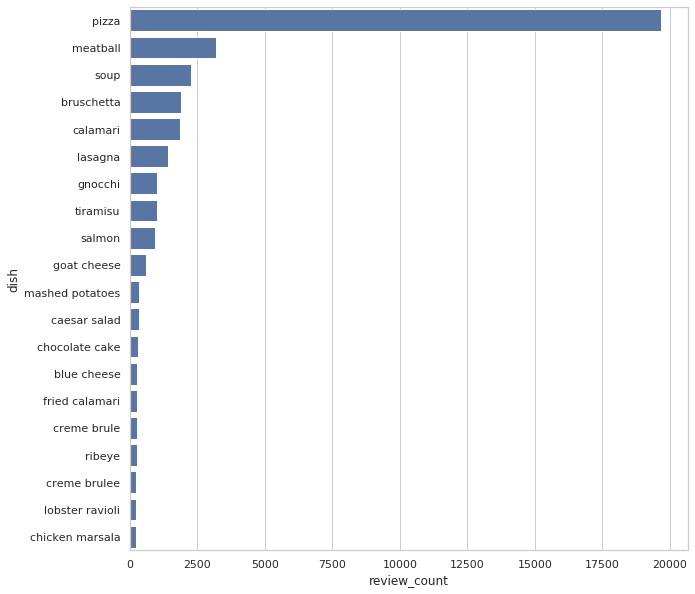

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(x='review_count', y='dish', data = dish_list.sort_values('review_count', ascending=False)[:20], color='b')

In [0]:
dish_list['restaurant_count'] = dish_list.dish.apply(lambda x : df[df.text_processed.str.contains(x)].business_id.unique().shape[0])

In [0]:
dish_list['review_restaurant_ratio'] = dish_list.review_count / dish_list.restaurant_count

In [18]:
dish_list.sort_values('review_restaurant_ratio', ascending=False)

,dish,review_count,restaurant_count,review_restaurant_ratio
104,pizza,19691,808,24.370050
11,cotton candy,125,10,12.500000
137,sweet potato tots,12,1,12.000000
38,foie gras,146,22,6.636364
105,bruschetta,1891,290,6.520690
...,...,...,...,...
86,house made mozzarella,15,14,1.071429
45,la favorita,3,3,1.000000
75,mascarpone guanciale mashed potatoes,1,1,1.000000
73,italian margarita,1,1,1.000000


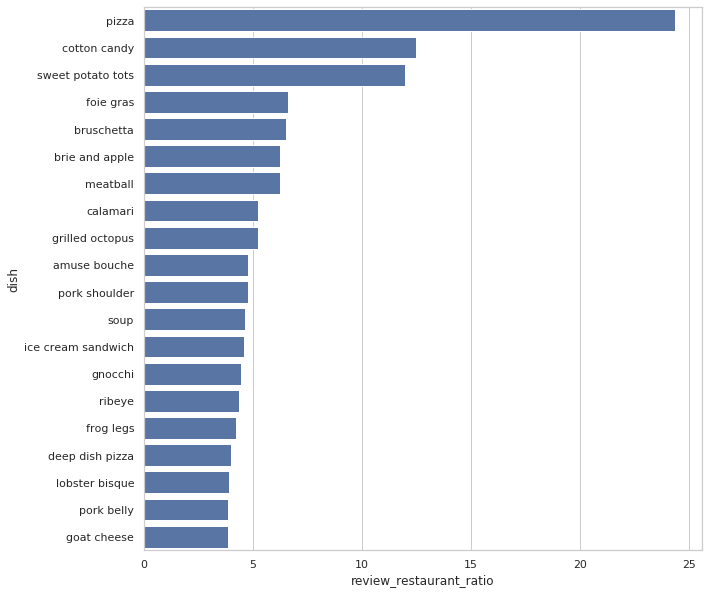

In [19]:
plt.figure(figsize=(10,10))
data = dish_list.sort_values('review_restaurant_ratio', ascending=False)[:20]
sns.barplot(x='review_restaurant_ratio', y='dish', data = data, color='b')

In [0]:
dish_list['average_review'] = dish_list.dish.apply(lambda x : df[df.text_processed.str.contains(x)].stars_x.mean())

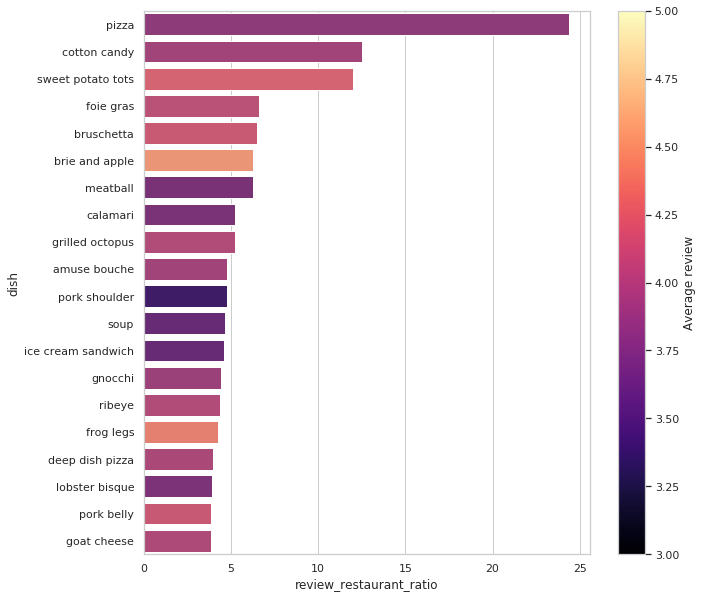

In [22]:
plt.figure(figsize=(10,10))
data = dish_list.sort_values('review_restaurant_ratio', ascending=False)[:20]

norm = plt.Normalize(math.floor(data.average_review.min()), math.ceil(data.average_review.max()))
cmap = plt.get_cmap("magma")
ax = sns.barplot(x='review_restaurant_ratio', y='dish', data = data, palette=cmap(norm(data.average_review.values)))
cbar = ax.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Average review')

### Task 5: Restaurant Recommendation

In this task, your goal is to recommend good restaurants to those who would like to try one or more dishes in a cuisine. Given a particular dish, the general idea of solving this problem is to assess whether a restaurant is good for this dish based on whether the reviews of a candidate restaurant have included many positive (and very few negative) comments about the dish. You may choose a target dish or a set of target dishes from the list of "popular dishes" you generated from Task 4 or, otherwise, choose any dishes that have been mentioned many times in the review data (the more reviews you have for a dish, the more basis you will have for ranking restaurants).



In [0]:
columns_dict = {'mean':'Average stars', 'count':'Number of reviews', 'name':'Restaurant name'}
tmp = df[df.text_processed.str.contains('pizza')].groupby(['business_id', 'name'])
tmp = tmp['stars_x'].agg(['mean', 'count']).reset_index().rename(columns=columns_dict).sort_values(by=['Average stars', 'Number of reviews'], ascending = False)


In [101]:
tmp[tmp['Number of reviews'] > 10]

,business_id,Restaurant name,Average stars,Number of reviews
404,VSPuvNSDUvlTl670lVAkkw,Il Bosco Pizza,4.693548,124
699,rWwz7S0fNmveQQM3PqnC1Q,Salvatore's Tomato Pies,4.682927,82
436,XfVGU6WGZKc867spn2TImw,Pomo Pizzeria Napoletana,4.633880,183
783,xr2szu7jYIWbj4tlKef61w,Pezzano's Pizza,4.571429,28
167,D7d-X4fLvVIdsCDFGpqzmg,My Pie,4.563380,71
...,...,...,...,...
751,v9d9yZtSCSZv0GSZ5ywJlQ,Top This Pizza,2.428571,14
659,objtwN6N5W2lvOzkFxfyaA,Sbarro,2.214286,14
643,n30q_HaFRWmjFR_bXh9_dg,Cafe Verdi,2.200000,20
70,67-DcR8Npwuc9lRph194cw,San Gennaro Feast,2.181818,11


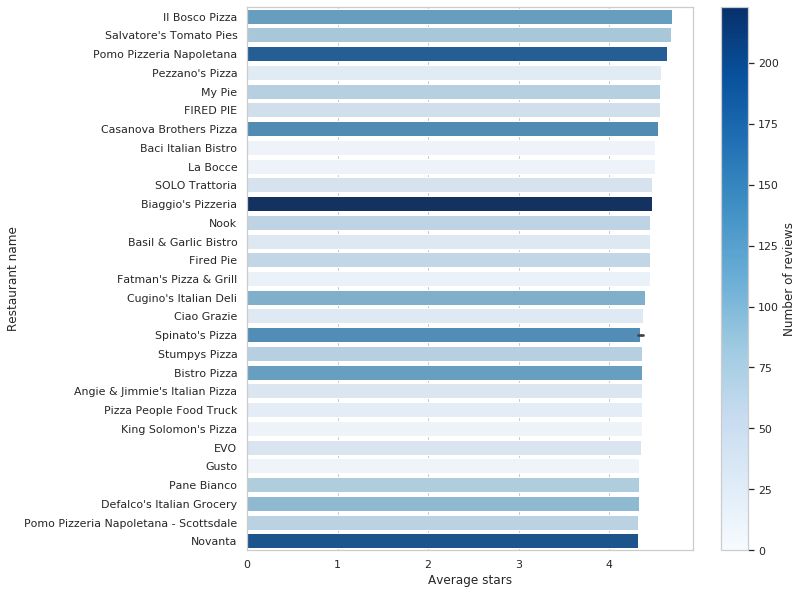

In [111]:
plt.figure(figsize=(10,10))
data = tmp[tmp['Number of reviews'] > 10][:30]

norm = plt.Normalize(0, math.ceil(data['Number of reviews'].max()))
cmap = plt.get_cmap("Blues")
ax = sns.barplot(x='Average stars', y='Restaurant name', data = data, palette=cmap(norm(data['Number of reviews'].values)))
cbar = ax.figure.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Number of reviews')